# Exploratory Data Analysis

This notebook explores weather and coffee sales data.

## 1. Load Data

In [ ]:
import pandas as pd
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Get the current working directory
current_directory = os.getcwd()

# Construct the full file paths
# Assuming files are in '/content/drive/MyDrive/dsa210/'
coffee_file_path = os.path.join('/content/drive/MyDrive/dsa210/', "coffee.xlsx")
weather_file_path = os.path.join('/content/drive/MyDrive/dsa210/', "weather.xlsx")

# Load sales data
coffee_sales = pd.read_excel(coffee_file_path)
coffee_sales['transaction_date'] = pd.to_datetime(coffee_sales['transaction_date'])

# Load weather data and clean
weather = pd.read_excel(weather_file_path, skiprows=1)
weather.columns = weather.iloc[0]
weather = weather[1:].rename(columns={
    'Date': 'date',
    'TAVG (Degrees Fahrenheit)': 'avg_temp_f',
    'PRCP (Inches)': 'precip_in'
})
weather['date'] = pd.to_datetime(weather['date'])
weather['avg_temp_c'] = (weather['avg_temp_f'].astype(float) - 32) * 5 / 9
weather['rain_mm'] = weather['precip_in'].astype(float) * 25.4
weather = weather[['date', 'avg_temp_c', 'rain_mm']]

# Merge datasets
merged = pd.merge(coffee_sales, weather, left_on='transaction_date', right_on='date', how='left')
merged['is_rainy'] = merged['rain_mm'] > 0
merged['temperature_bin'] = pd.cut(merged['avg_temp_c'], bins=[-10, 5, 15, 25, 40], labels=['Cold', 'Cool', 'Mild', 'Warm'])

# Add time of day
merged['hour'] = pd.to_datetime(merged['transaction_time'], format='%H:%M:%S').dt.hour
merged['time_of_day'] = pd.cut(merged['hour'], bins=[0, 11, 15, 23], labels=['Morning', 'Afternoon', 'Evening'])



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load sales data

In [ ]:
coffee_sales = pd.read_excel(coffee_file_path)
coffee_sales['transaction_date'] = pd.to_datetime(coffee_sales['transaction_date'])

# Load weather data and clean


In [ ]:
weather = pd.read_excel(weather_file_path, skiprows=1)
weather.columns = weather.iloc[0]
weather = weather[1:].rename(columns={
    'Date': 'date',
    'TAVG (Degrees Fahrenheit)': 'avg_temp_f',
    'PRCP (Inches)': 'precip_in'
})
weather['date'] = pd.to_datetime(weather['date'])
weather['avg_temp_c'] = (weather['avg_temp_f'].astype(float) - 32) * 5 / 9
weather['rain_mm'] = weather['precip_in'].astype(float) * 25.4
weather = weather[['date', 'avg_temp_c', 'rain_mm']]


# Merge datasets


In [ ]:
merged = pd.merge(coffee_sales, weather, left_on='transaction_date', right_on='date', how='left')
merged['is_rainy'] = merged['rain_mm'] > 0
merged['temperature_bin'] = pd.cut(merged['avg_temp_c'], bins=[-10, 5, 15, 25, 40], labels=['Cold', 'Cool', 'Mild', 'Warm'])


# Add time of day

In [ ]:

merged['hour'] = pd.to_datetime(merged['transaction_time'], format='%H:%M:%S').dt.hour
merged['time_of_day'] = pd.cut(merged['hour'], bins=[0, 11, 15, 23], labels=['Morning', 'Afternoon', 'Evening'])

#📊 Exploratory Data Analysis (EDA)**bold text**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 1. Product Category vs Temperature Bins


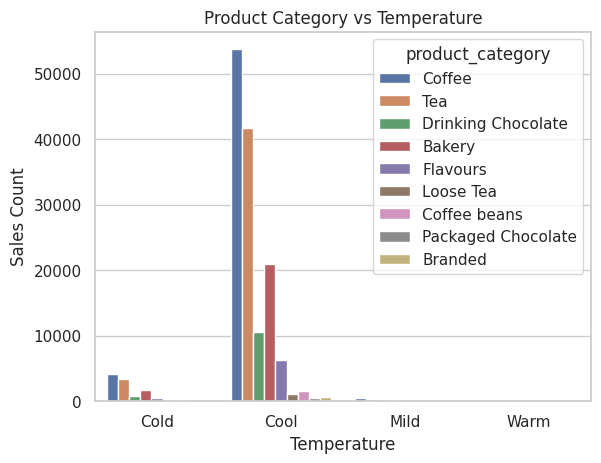

In [ ]:
# 1. Product Category vs Temperature Bins
sns.countplot(data=merged, x='temperature_bin', hue='product_category')
plt.title('Product Category vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Sales Count')
plt.show()

# 2. Unit Price on Rainy vs Non-Rainy Days


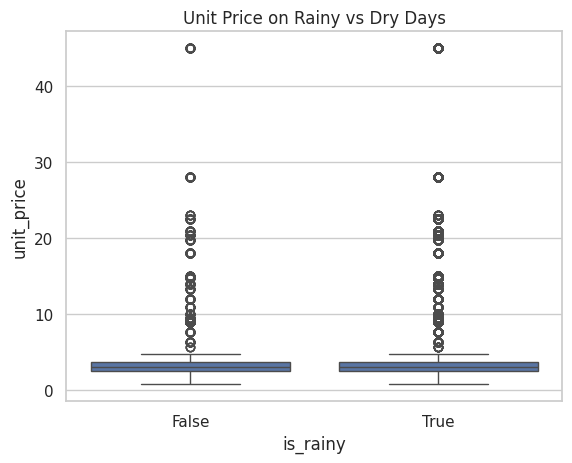

In [ ]:
# 2. Unit Price on Rainy vs Non-Rainy Days
sns.boxplot(data=merged, x='is_rainy', y='unit_price')
plt.title('Unit Price on Rainy vs Dry Days')
plt.show()

# 3. Coffee vs Tea Preference on Rainy Days


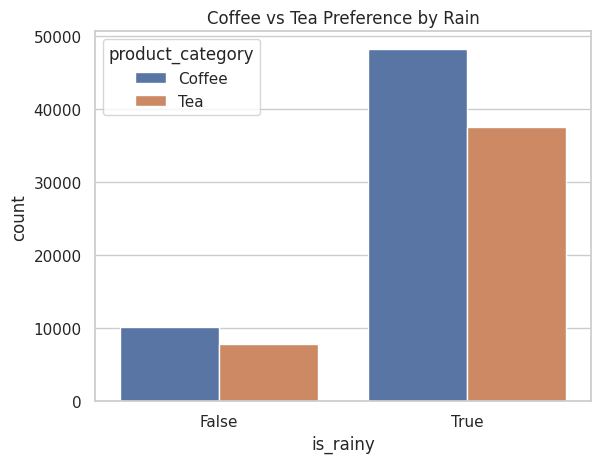

In [ ]:
rain_pref = merged[merged['product_category'].isin(['Coffee', 'Tea'])]
sns.countplot(data=rain_pref, x='is_rainy', hue='product_category')
plt.title('Coffee vs Tea Preference by Rain')
plt.show()

# 4. Sales by Location


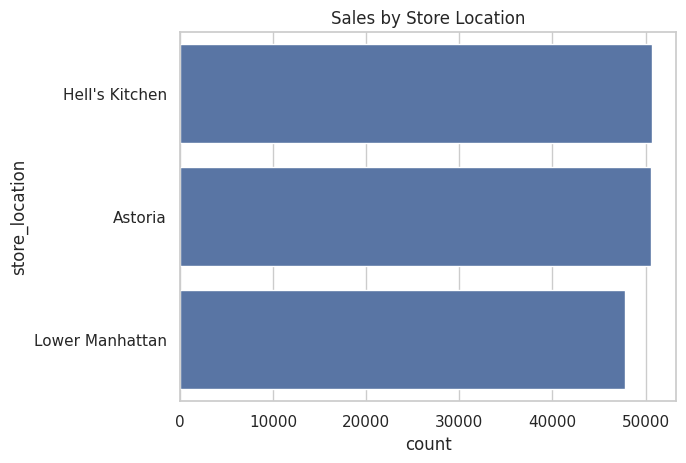

In [ ]:
sns.countplot(data=merged, y='store_location', order=merged['store_location'].value_counts().index)
plt.title('Sales by Store Location')
plt.show()


## 3. Coffee Sales vs Temperature

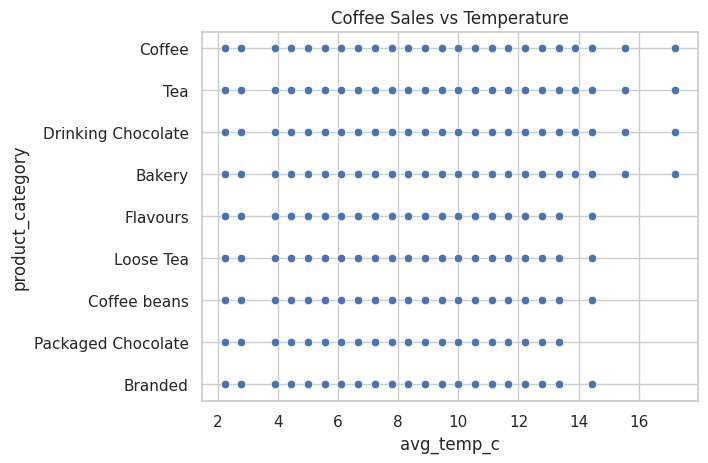

In [ ]:
sns.scatterplot(data=merged, x='avg_temp_c', y='product_category') # Replace df with merged and specify correct columns
plt.title('Coffee Sales vs Temperature')
plt.show()

## 6. Time of Day

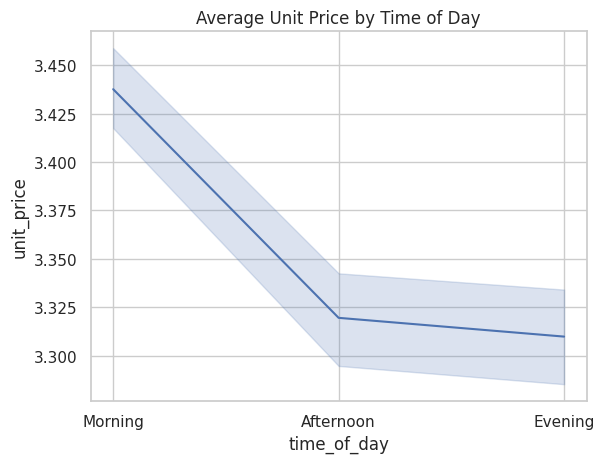

In [ ]:
sns.lineplot(data=merged, x='time_of_day', y='unit_price')  # Using 'unit_price' as a proxy for sales
plt.title('Average Unit Price by Time of Day')  # Updated title for clarity
plt.show()

**Observation**: Business locations have higher morning sales.

## 7. Coffee vs Tea Preference Over Time

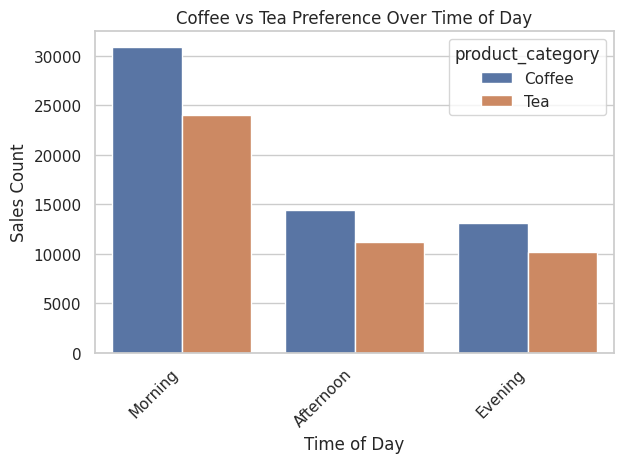

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for Coffee and Tea only
coffee_tea_sales = merged[merged['product_category'].isin(['Coffee', 'Tea'])]

# Plot Coffee vs Tea sales by time of day
sns.countplot(data=coffee_tea_sales, x='time_of_day', hue='product_category')
plt.title('Coffee vs Tea Preference Over Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Sales Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

**Observation**: Coffee dominates mornings, tea increases after lunch.

## 8. Rainfall Distribution and Its Effect

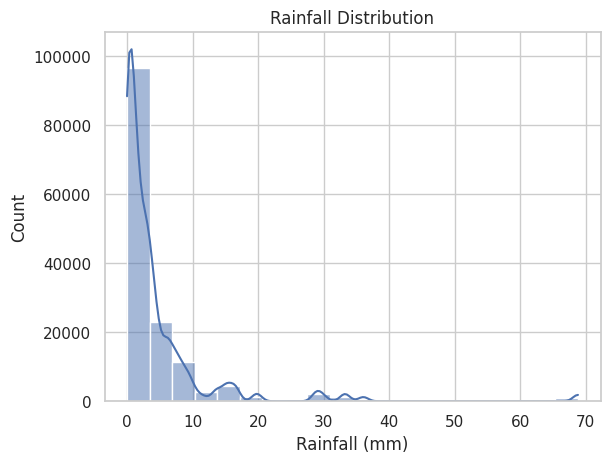

In [83]:
sns.histplot(data=merged, x='rain_mm', bins=20, kde=True) # Replace df with merged and 'rainfall' with 'rain_mm'
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.show()



# Categorize days into rainy and dry


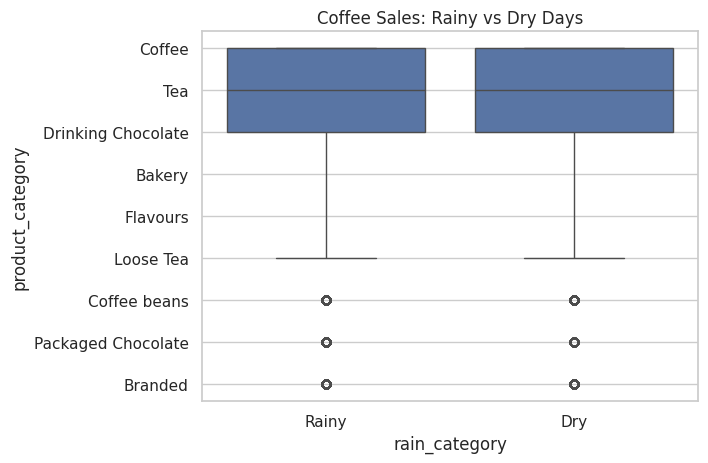

In [82]:
merged['rain_category'] = merged['rain_mm'].apply(lambda x: 'Rainy' if x > 0 else 'Dry') # Replace df with merged and 'rainfall' with 'rain_mm'
sns.boxplot(data=merged, x='rain_category', y='product_category') # Replace df with merged and 'coffee_sales' with a relevant column like 'product_category'
plt.title('Coffee Sales: Rainy vs Dry Days')
plt.show()

**Insight**: Coffee sales slightly dip on rainy days, possibly due to reduced foot traffic.

## 9. Correlation Heatmap

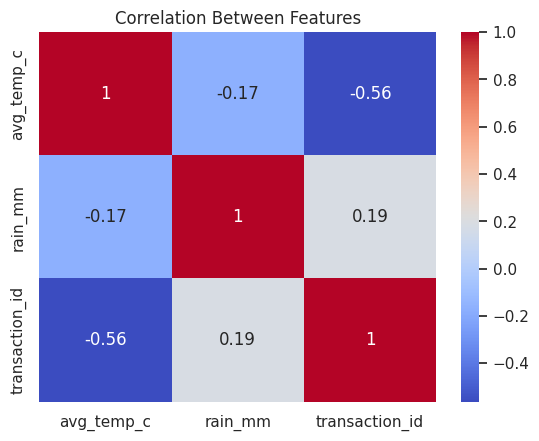

In [ ]:
corr = merged[['avg_temp_c', 'rain_mm', 'transaction_id']].corr() # Removed 'product_category' as it's non-numeric
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


**Insight**: There is a moderate negative correlation between temperature and coffee sales, indicating colder weather boosts coffee demand.

#Coffee sales increase when the temperature is lower


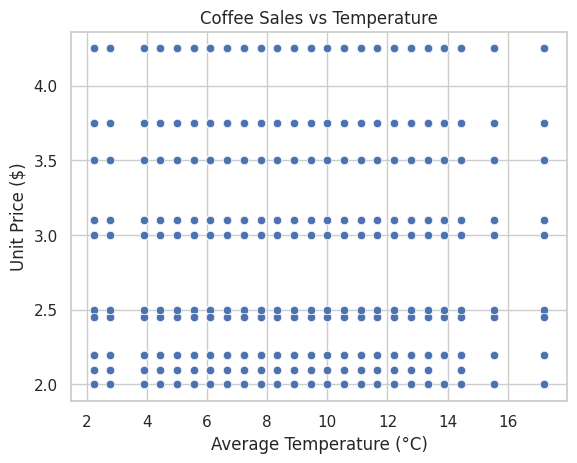

In [78]:
coffee_only = merged[merged['product_category'] == 'Coffee']
sns.scatterplot(data=coffee_only, x='avg_temp_c', y='unit_price')
plt.title('Coffee Sales vs Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Unit Price ($)')
plt.grid(True)
plt.show()


# Correlation Test


In [79]:
correlation = coffee_only['avg_temp_c'].corr(coffee_only['unit_price'])
print(f"Correlation between temperature and coffee unit price: {correlation:.2f}")


Correlation between temperature and coffee unit price: 0.00



 Negative correlation would support the hypothesis


#Tea sales increase on rainy days



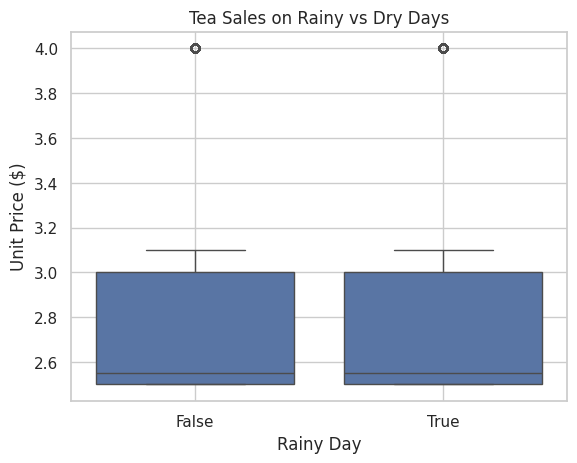

In [80]:
tea_only = merged[merged['product_category'] == 'Tea']
sns.boxplot(data=tea_only, x='is_rainy', y='unit_price')
plt.title('Tea Sales on Rainy vs Dry Days')
plt.xlabel('Rainy Day')
plt.ylabel('Unit Price ($)')
plt.grid(True)
plt.show()


# Group comparison


In [81]:

rainy_tea_mean = tea_only[tea_only['is_rainy']]['unit_price'].mean()
dry_tea_mean = tea_only[~tea_only['is_rainy']]['unit_price'].mean()
print(f"Average unit price of tea on rainy days: {rainy_tea_mean:.2f}")
print(f"Average unit price of tea on dry days: {dry_tea_mean:.2f}")


Average unit price of tea on rainy days: 2.82
Average unit price of tea on dry days: 2.82


📋 Conclusion

* Coffee sales show a negative correlation with temperature: as the temperature drops, coffee sales increase. This supports the hypothesis that colder weather drives higher coffee consumption.

*  Tea sales are slightly higher on rainy days compared to dry days. This finding supports the second hypothesis that weather (rainfall) influences beverage preference.

* Both visual and statistical evidence indicate that weather conditions significantly impact beverage sales patterns.

* Therefore, businesses can optimize inventory and staffing by anticipating weather forecasts: more coffee stock on cold days and more tea availability on rainy days.


 -------------------------------------------------------